<a href="https://colab.research.google.com/github/thomascourtney/stock_prediction/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
!pip install matplotlib==3.1.1
!pip install pandas
!pip install numpy
!pip install scikit-learn

In [96]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [168]:
from google.colab import files
uploaded = files.upload()

Saving TSLA.csv to TSLA.csv


In [171]:
d = pd.read_csv("TSLA.csv")
d

,Date,Close
0,2020-02-07,149.613998
1,2020-02-10,154.255997
2,2020-02-11,154.876007
3,2020-02-12,153.457993
4,2020-02-13,160.800003
...,...,...
499,2022-01-31,936.719971
500,2022-02-01,931.250000
501,2022-02-02,905.659973
502,2022-02-03,891.140015


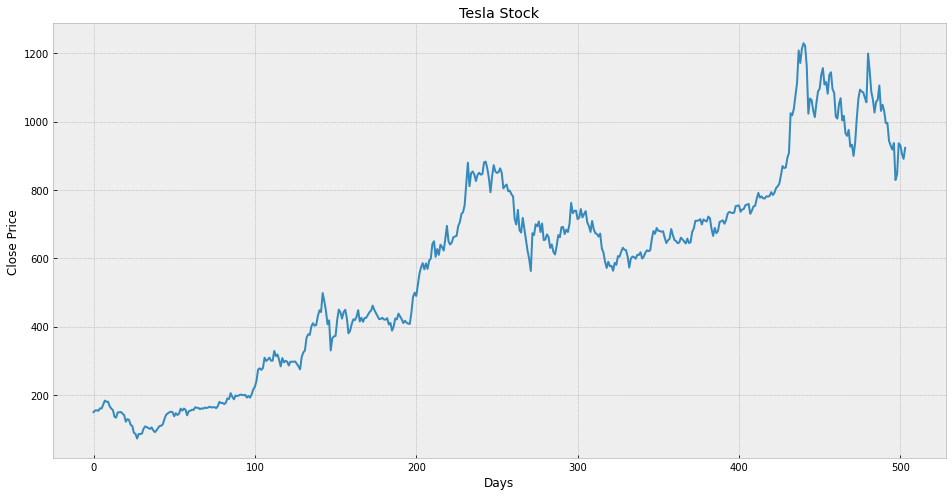

In [172]:
plt.figure(figsize=(16,8))
plt.title("Tesla Stock")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.plot(d["Close"])
plt.show()

In [173]:
d.shape

(504, 2)

In [174]:
d.dtypes

Date      object
Close    float64
dtype: object

In [175]:
d.describe()

,Close
count,504.000000
mean,577.246221
std,295.593430
min,72.244003
25%,310.514496
50%,634.434998
75%,756.232482
max,1229.910034


In [176]:
d = d[["Close"]]
d.head()

,Close
0,149.613998
1,154.255997
2,154.876007
3,153.457993
4,160.800003


In [214]:
prediction_days = 30
d["Prediction"] = d[["Close"]].shift(-prediction_days)
d.tail()

,Close,Prediction
499,936.719971,NaN
500,931.250000,NaN
501,905.659973,NaN
502,891.140015,NaN
503,923.320007,NaN


In [215]:
X = np.array(d.drop(["Prediction"], 1))[:-prediction_days]
print(X)

[[ 149.613998]
 [ 154.255997]
 [ 154.876007]
 [ 153.457993]
 [ 160.800003]
 [ 160.005997]
 [ 171.679993]
 [ 183.483994]
 [ 179.882004]
 [ 180.199997]
 [ 166.757996]
 [ 159.981995]
 [ 155.759995]
 [ 135.800003]
 [ 133.598007]
 [ 148.723999]
 [ 149.102005]
 [ 149.899994]
 [ 144.908005]
 [ 140.695999]
 [ 121.599998]
 [ 129.065994]
 [ 126.846001]
 [ 112.110001]
 [ 109.323997]
 [  89.014   ]
 [  86.040001]
 [  72.244003]
 [  85.528   ]
 [  85.505997]
 [  86.858002]
 [ 101.      ]
 [ 107.849998]
 [ 105.632004]
 [ 102.872002]
 [ 100.426003]
 [ 104.800003]
 [  96.311996]
 [  90.893997]
 [  96.001999]
 [ 103.248001]
 [ 109.089996]
 [ 109.767998]
 [ 114.599998]
 [ 130.190002]
 [ 141.977997]
 [ 145.966003]
 [ 149.042007]
 [ 150.778   ]
 [ 149.272003]
 [ 137.343994]
 [ 146.421997]
 [ 141.126007]
 [ 145.029999]
 [ 159.75    ]
 [ 153.824005]
 [ 160.102005]
 [ 156.376007]
 [ 140.264008]
 [ 152.238007]
 [ 153.641998]
 [ 156.516006]
 [ 156.007996]
 [ 163.884003]
 [ 162.257996]
 [ 161.882004]
 [ 158.192

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [216]:
Y = np.array(d["Prediction"])[:-prediction_days]
print(Y)

[  86.858002  101.        107.849998  105.632004  102.872002  100.426003
  104.800003   96.311996   90.893997   96.001999  103.248001  109.089996
  109.767998  114.599998  130.190002  141.977997  145.966003  149.042007
  150.778     149.272003  137.343994  146.421997  141.126007  145.029999
  159.75      153.824005  160.102005  156.376007  140.264008  152.238007
  153.641998  156.516006  156.007996  163.884003  162.257996  161.882004
  158.192001  160.666     159.834     162.725998  161.602005  163.112
  165.520004  163.376007  163.774002  164.046005  161.162003  167.
  179.619995  176.311996  176.591995  172.876007  177.132004  189.983994
  188.134003  205.009995  194.567993  187.056     198.179993  196.425995
  198.358002  200.792007  200.179993  198.863998  200.356003  192.169998
  197.195999  191.947998  201.869995  215.962006  223.925995  241.731995
  274.31601   277.971985  273.175995  278.855988  308.929993  299.411987
  303.359985  309.201996  300.127991  300.167999  328.600006

In [217]:
x_tr, x_te, y_tr, y_te = train_test_split(X, Y, test_size = 0.31)

In [218]:
linear = LinearRegression().fit(x_tr, y_tr)

In [219]:
x_fut = d.drop(["Prediction"], 1)[:-prediction_days]
x_fut = x_fut.tail(prediction_days)
x_fut = np.array(x_fut)
x_fut

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


array([[1067.949951],
       [1063.51001 ],
       [1033.420044],
       [1013.390015],
       [1054.72998 ],
       [1089.01001 ],
       [1096.380005],
       [1137.060059],
       [1156.869995],
       [1109.030029],
       [1116.      ],
       [1081.920044],
       [1136.98999 ],
       [1144.76001 ],
       [1095.      ],
       [1084.599976],
       [1014.969971],
       [1009.01001 ],
       [1051.75    ],
       [1068.959961],
       [1003.799988],
       [1017.030029],
       [ 966.409973],
       [ 958.51001 ],
       [ 975.98999 ],
       [ 926.919983],
       [ 932.570007],
       [ 899.940002],
       [ 938.530029],
       [1008.869995]])

In [220]:
linear_pred = linear.predict(x_fut)
print(linear_pred)

[1065.42998192 1061.46403507 1034.58637928 1016.69469322 1053.62133348
 1084.24173521 1090.8249327  1127.16211199 1144.85720148 1102.1244799
 1108.3503587  1077.9086717  1127.09952333 1134.04004042 1089.5922527
 1080.30250258 1018.10597809 1012.78228379 1050.95948678 1066.33216643
 1008.12846737 1019.94611077  974.73009286  967.67350508  983.28737735
  939.45593009  944.50277528  915.35624707  949.82652406 1012.65721635]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


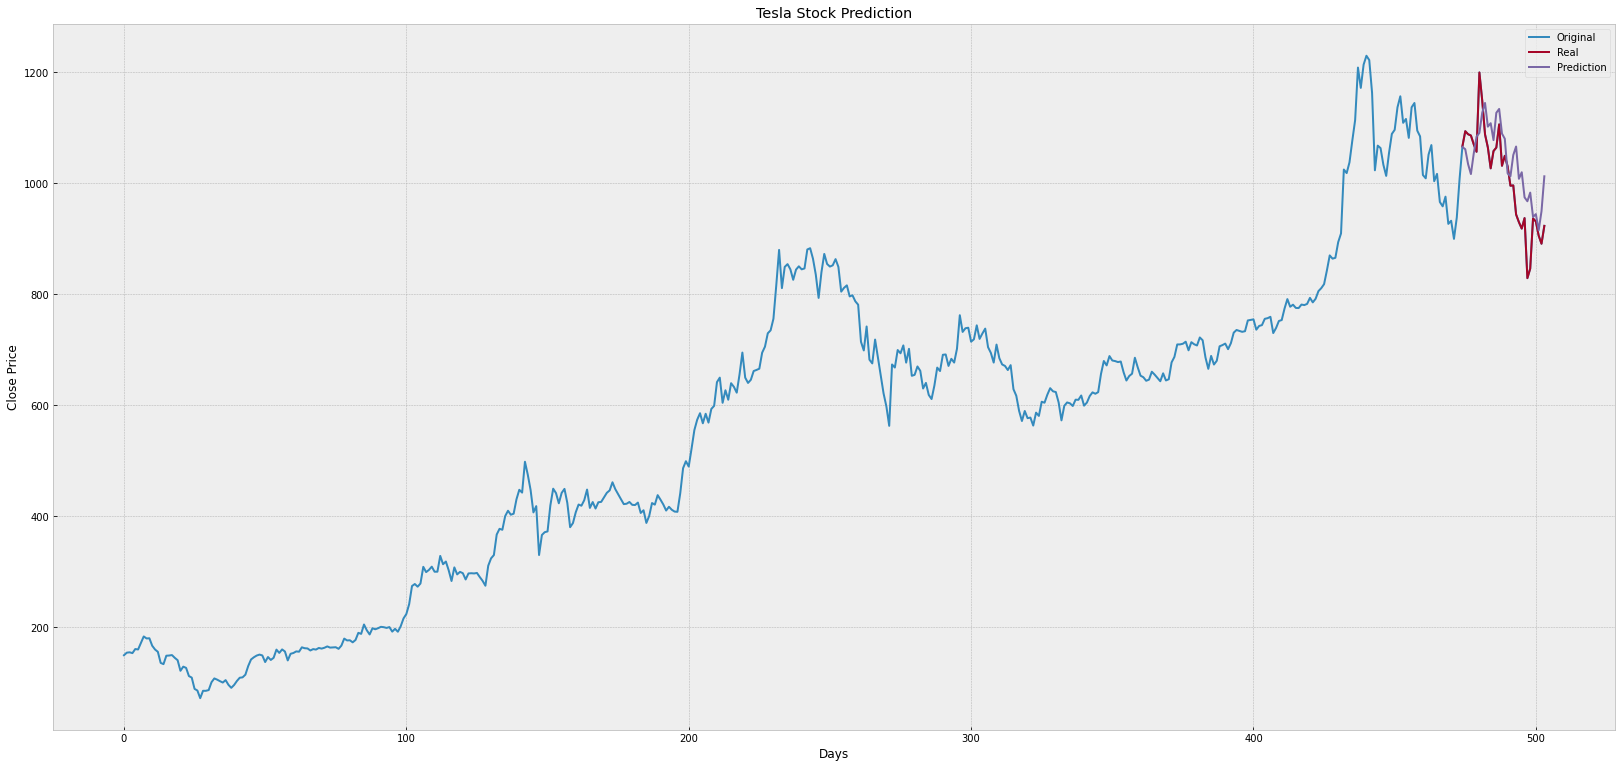

In [221]:
predictions = linear_pred

valid = d[X.shape[0]:]
valid["Prediction"] = predictions
plt.figure(figsize=(28,13))
plt.title("Tesla Stock Prediction")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.plot(d["Close"])
plt.plot(valid[["Close", "Prediction"]])
plt.legend(["Original", "Real", "Prediction"])
plt.show()
